## Gradient Descent Mini Lab

In this short lab we will visualize the gradient descent algorithm and build a better understanding of the algorithm's hyper-parameters.

In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.stats
import scipy.misc

%matplotlib inline

## Generate the "loss" 

Ideally, the error has a nice convex shape, like a quadratic function. For the purposes of this exercise we'll use a two-dimensional normal distribution. 

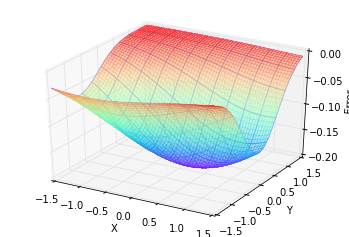

In [19]:
cx = 0.5
cy = -0.2

lim = 1.5
x, y = np.mgrid[-lim:lim:.01, -lim:lim:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = scipy.stats.multivariate_normal([cx, cy], [[2.0, 0.3], [0.5, 0.5]])
pdf = lambda x: -rv.pdf(x)
z = pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, rstride=30, cstride=30, alpha=0.3)
ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.rainbow, #cmap=cm.cool,
                linewidth=0, antialiased=False, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Error')

## Visualize Gradient Descent

Let's learn the minima of the loss function. We'll do this by implementing a toy gradient descent algorithm and plotting the sequence of positions.

Terminated after 38 of 1000 itterations
Initial Guess at (-1.39, 0.06)
Fit Minima at (0.40, -0.23)
True Minima at (0.50, -0.20)


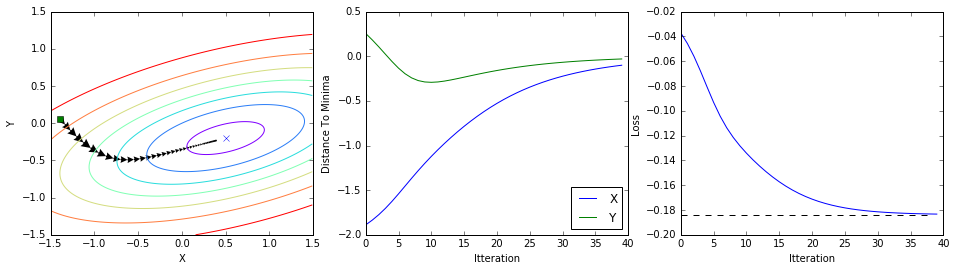

In [30]:
# Model hyper-parameters
lr = 1  # The learning rate for each update
n_iter = 1000  # Max number of itteration before the algorithm should give up
eps = 0.0001  # The threshold at which we will consider the algorithm as having converged

# Fixed initial guess for values
# posx = [1.08]
# posy = [0.57]

# Random initial guess for values
posx = [np.random.random()*2*lim - lim]
posy = [np.random.random()*2*lim - lim]

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def dim_func(x):
        args[var] = x
        return func(args)
    return scipy.misc.derivative(dim_func, point[var], dx = 1e-6)

# Walk along the gradient till we find a solution
for i in range(n_iter):
    x0 = posx[-1]
    y0 = posy[-1]
    posx.append(x0 - lr * partial_derivative(pdf, 0, [x0, y0]))
    posy.append(y0 - lr * partial_derivative(pdf, 1, [x0, y0]))
    if np.abs(np.diff(pdf(zip(posx[-2:], posy[-2:])))) < eps:
        break

posx = np.array(posx)
posy = np.array(posy)

fig, axs = plt.subplots(1, 3, figsize=(16,4))

ax = axs[0]
ax.contour(x, y, z, cmap=cm.rainbow)#cmap=cm.cool,)
ax.plot(cx, cy, 'x')
ax.plot(posx[0], posy[0], 's')
ax.quiver(
    posx[:-1], posy[:-1], 
    np.diff(posx), np.diff(posy), 
    scale_units='xy', 
    angles='xy', 
    scale=1., 
    headwidth=5,
)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = axs[1]
ax.plot(posx - cx, label='X')
ax.plot(posy - cy, label='Y')
ax.set_xlabel('Itteration')
ax.set_ylabel('Distance To Minima')
ax.legend(loc='best')

ax = axs[2]
ax.plot(pdf(zip(posx, posy)))
ax.plot([0, i], [pdf((cx, cy))]*2, 'k--')
ax.set_xlabel('Itteration')
ax.set_ylabel('Loss')

print 'Terminated after %d of %d itterations' % (i, n_iter)
print 'Initial Guess at (%.2f, %.2f)' % (posx[0], posy[0])
print 'Fit Minima at (%.2f, %.2f)' % (posx[-1], posy[-1])
print 'True Minima at (%.2f, %.2f)' % (cx, cy)

## Open Questions

* How are the number of iterations and final solution affected by:
 * The initial guess
 * The size of the learning rate
 * The epsilon
 * The magnitude of the gradient